In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tdc

In [2]:
h2o1Positions = np.array([[1.499561,    0.481781,   -0.223847],[2.016679,   -0.308853,   -0.005570],[0.941077,    0.617162,    0.560577]])
h2o2Positions = np.array([[-1.190888,   -0.054614,    0.209353],[-0.484323,   -0.083043,   -0.460235],[-1.760870,    0.672061,   -0.083951]])

In [3]:
dimerPositions = np.concatenate((h2o1Positions,h2o2Positions),axis=0)

In [4]:
h2oMonomer = tdc.freq("h2o_tdc_calc.log")

In [10]:
h2oTdcDimer = tdc.tdc(h2oMonomer,dimerPositions)

In [11]:
h2oTdcDimer.frequencies

array([1709.50252486, 1719.10030407, 3723.98326204, 3724.08060752,
       3844.98045686, 3845.60053587])

In [12]:
h2oTdcDimer.irIntensities

array([3.15825897e-01, 1.50786067e+02, 7.16015817e-03, 3.33442641e+00,
       3.78078459e+01, 4.31680703e-01])

In [15]:
dftDimer = tdc.freq("../dimer/water_dimer.log")
dimerModes = [6,7,8,9,10,11]
dftDimer.select_modes(dimerModes)

(3600, 4000)

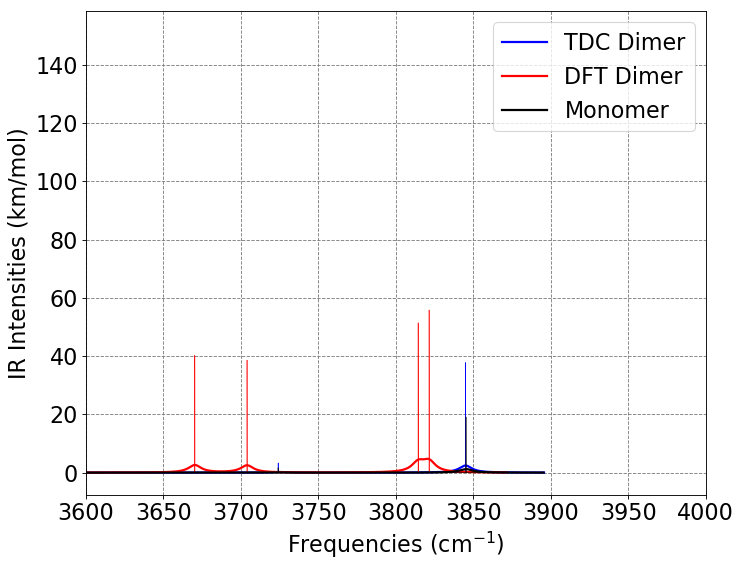

In [22]:
fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("Frequencies (cm$^{-1}$)",size=20)
ax.set_ylabel("IR Intensities (km/mol)",size=20)
plt.tick_params(axis='both',labelsize=20)
tdcSticks = h2oTdcDimer.sticks()
tdcLorentz = h2oTdcDimer.lorentzian_convolution()
dftSticks = dftDimer.sticks()
dftLorentz = dftDimer.lorentzian_convolution()
monomerSticks = h2oMonomer.sticks()
monomerLorentz = h2oMonomer.lorentzian_convolution()
ax.plot(tdcSticks[:,0],tdcSticks[:,1],c="b",lw=0.5)
ax.plot(tdcLorentz[:,0],tdcLorentz[:,1],c="b",lw=2,label="TDC Dimer")
ax.plot(dftSticks[:,0],dftSticks[:,1],c="r",lw=0.5)
ax.plot(dftLorentz[:,0],dftLorentz[:,1],c="r",lw=2,label="DFT Dimer")
ax.plot(monomerSticks[:,0],monomerSticks[:,1],c="k",lw=0.5)
ax.plot(monomerLorentz[:,0],monomerLorentz[:,1],c="k",lw=2,label="Monomer")
plt.legend(fontsize=20)
#plt.xlim(1700,1775)
plt.xlim(3600,4000)
#plt.ylim(0,200)